### Black-Scholes Option Pricing

Function Params:
* S: spot price
* K: strike price
* T: time to maturity (years)
* r: risk-free rate
* sigma: volatility 
* option_type: call or put

In [11]:
# Import libraries
import math
from scipy.stats import norm
from IPython.display import Image, display

# Get formulas
file_path = '/Users/****/Desktop/'
bsm_formula = f'{file_path}bsm_formula.png'
delta_formula = f'{file_path}delta_formula.png'
vega_formula = f'{file_path}vega_formula.png'
gamma_formula = f'{file_path}gamma_formula.png'
theta_formula = f'{file_path}theta_formula.png'
rho_formula = f'{file_path}rho_formula.png'

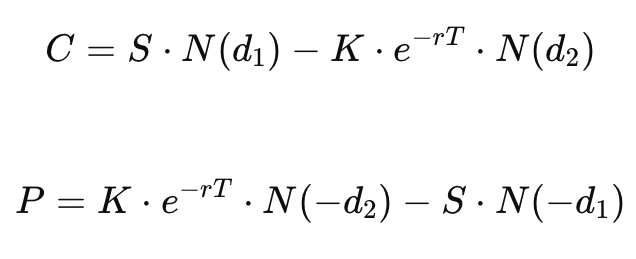

In [12]:
display(Image(filename=bsm_formula))

In [13]:
def calculate_option_price(S, K, T, r, sigma, option_type='call'):
    # Calculate d1 and d2
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


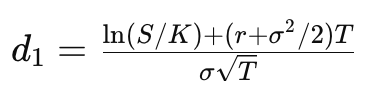

In [14]:
display(Image(filename=delta_formula))

In [15]:
def calculate_option_delta(S, K, T, r, sigma, option_type='call'):
    # Calculate d1
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    
    if option_type == 'call':
        delta = norm.cdf(d1)  # Call option delta
    elif option_type == 'put':
        delta = norm.cdf(d1) - 1  # Put option delta
    else:
        raise ValueError("Invalid option type. Must be 'call' or 'put'.")
    
    return delta


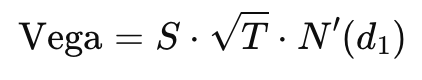

In [16]:
display(Image(filename=vega_formula))

In [17]:
def calculate_option_vega(S, K, T, r, sigma):
    # Calculate d1
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    
    # N'(d1) is the PDF of the standard normal distribution at d1
    pdf_d1 = norm.pdf(d1)
    
    # Calculate Vega
    vega = S * math.sqrt(T) * pdf_d1
    
    return vega


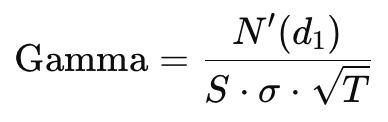

In [18]:
display(Image(filename=gamma_formula))

In [19]:
def calculate_option_gamma(S, K, T, r, sigma):
    # Calculate d1
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    
    # N'(d1) is the PDF of the standard normal distribution at d1
    pdf_d1 = norm.pdf(d1)
    
    # Calculate Gamma
    gamma = pdf_d1 / (S * sigma * math.sqrt(T))
    
    return gamma


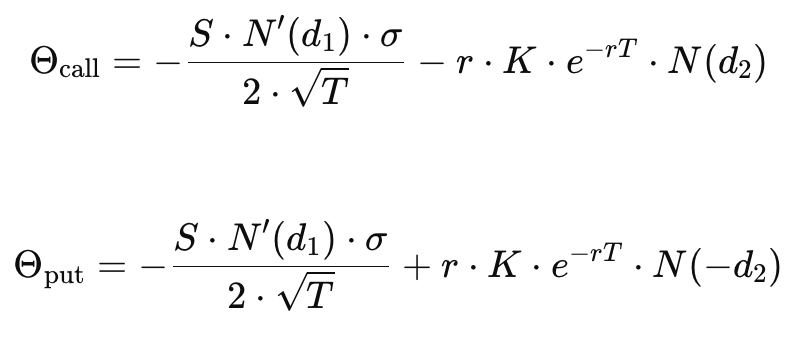

In [20]:
display(Image(filename=theta_formula))

In [21]:
def calculate_option_theta(S, K, T, r, sigma, option_type='call'):
    # Calculate d1 and d2
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # Common term for both call and put
    first_term = -(S * norm.pdf(d1) * sigma) / (2 * math.sqrt(T))
    
    if option_type == 'call':
        second_term = -r * K * math.exp(-r * T) * norm.cdf(d2)
        theta = first_term + second_term
    elif option_type == 'put':
        second_term = r * K * math.exp(-r * T) * norm.cdf(-d2)
        theta = first_term + second_term
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # Convert to per day (assuming 365 days in a year)
    theta_per_day = theta / 365.0
    
    return theta_per_day


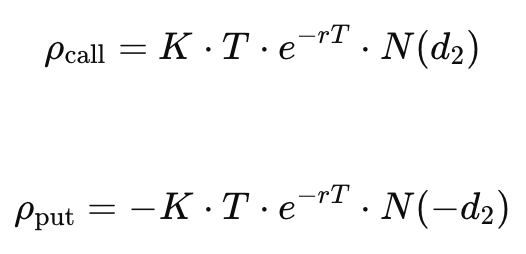

In [22]:
display(Image(filename=rho_formula))

In [23]:
def calculate_option_rho(S, K, T, r, sigma, option_type='call'):
    # Calculate d1 and d2
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        rho = K * T * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        rho = -K * T * math.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return rho
